In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = './final_agg_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)

Descriptive Statistics:
              YEAR           FAH          FAFH  Total nominal food sales  \
count  1875.000000   1875.000000   1875.000000               1875.000000   
mean   2014.000000  22916.808795  22108.576597              45025.385259   
std       0.816714  20214.531885  21145.998076              41291.792675   
min    2013.000000   1205.910000   1095.420000               2301.340000   
25%    2013.000000  10167.750000   8547.420000              19139.700000   
50%    2014.000000  15652.640000  13795.290000              29779.750000   
75%    2015.000000  26493.350000  24741.250000              50956.980000   
max    2015.000000  86767.080000  95228.440000             181995.520000   

              FAH.1        FAFH.1  Total constant dollar food sales  \
count   1875.000000   1875.000000                       1875.000000   
mean   11201.306603  10786.329739                      21987.636011   
std     9871.878852  10285.026028                      20126.803367   
min    

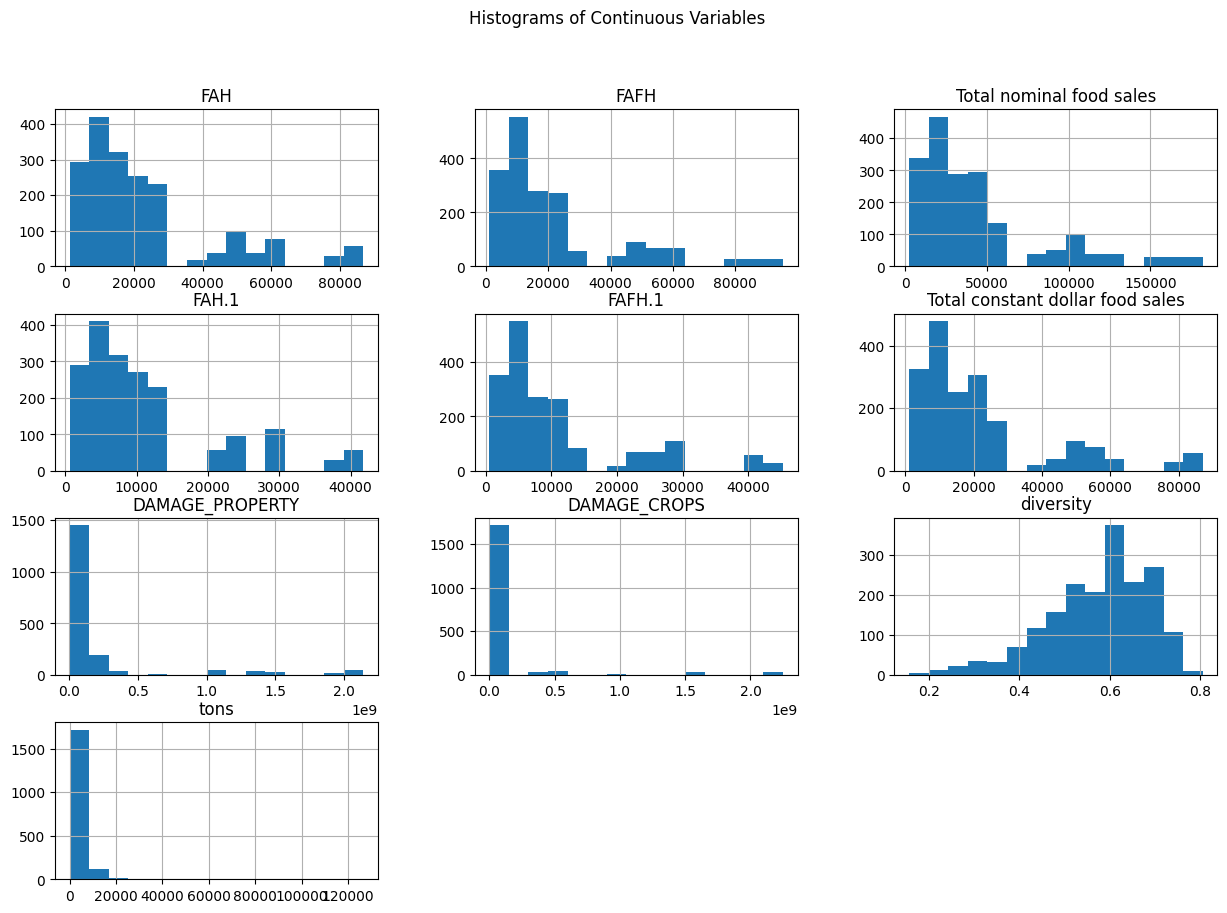

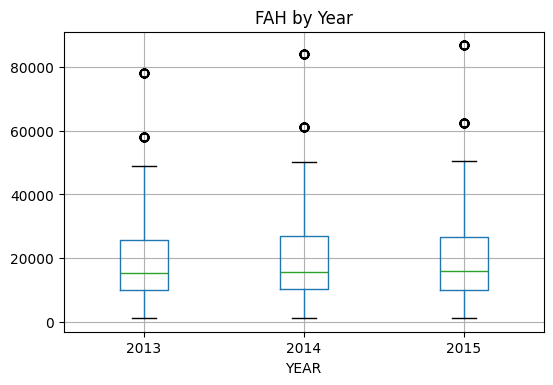

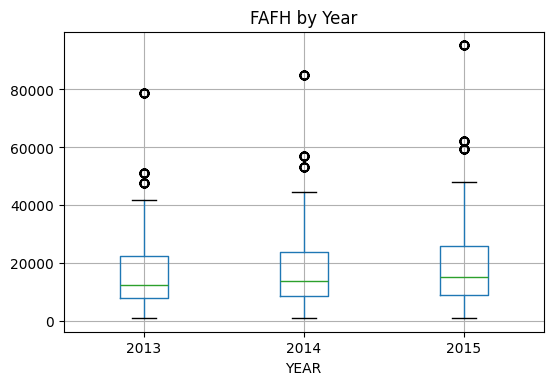

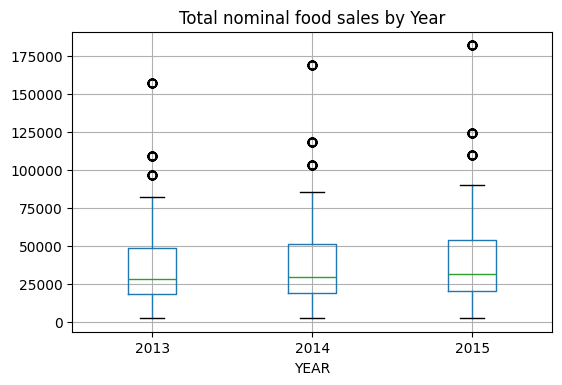

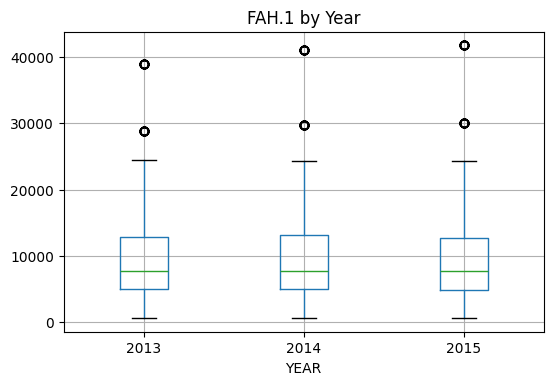

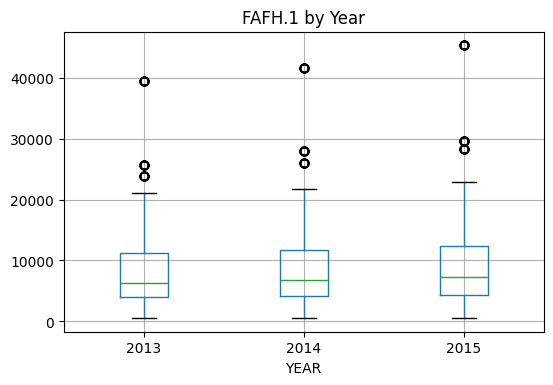

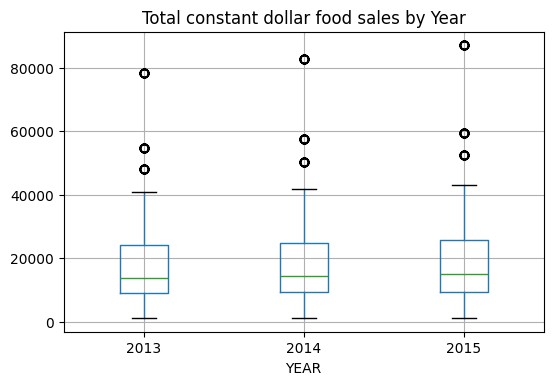

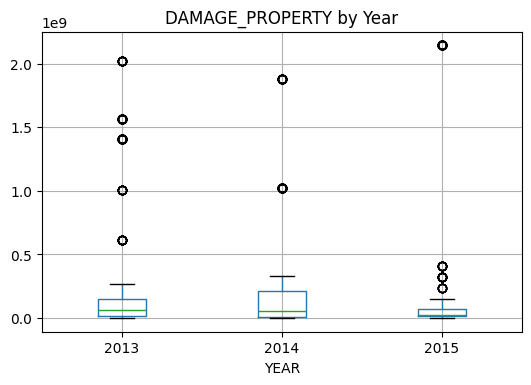

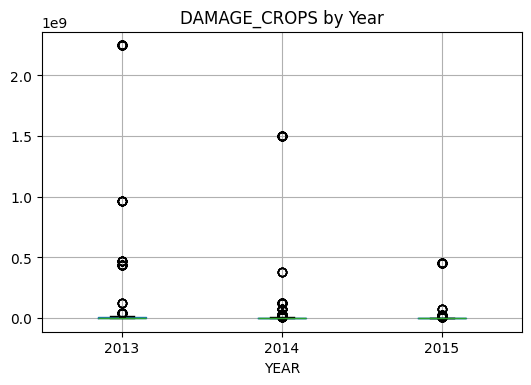

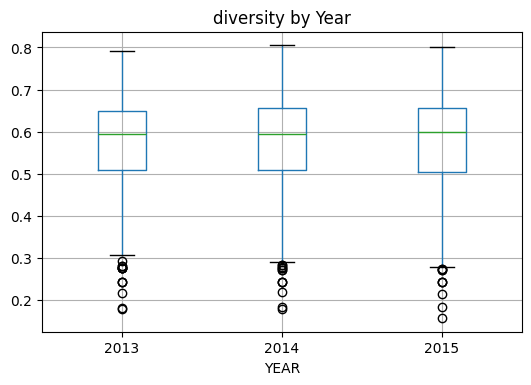

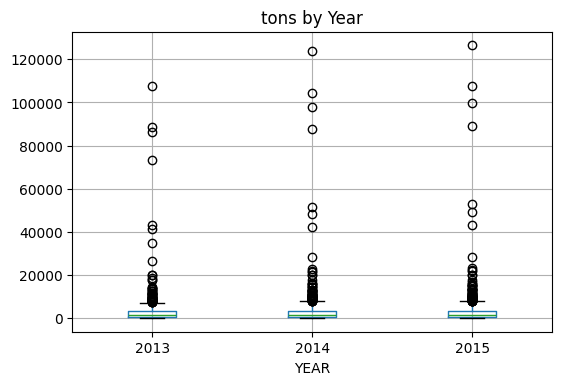

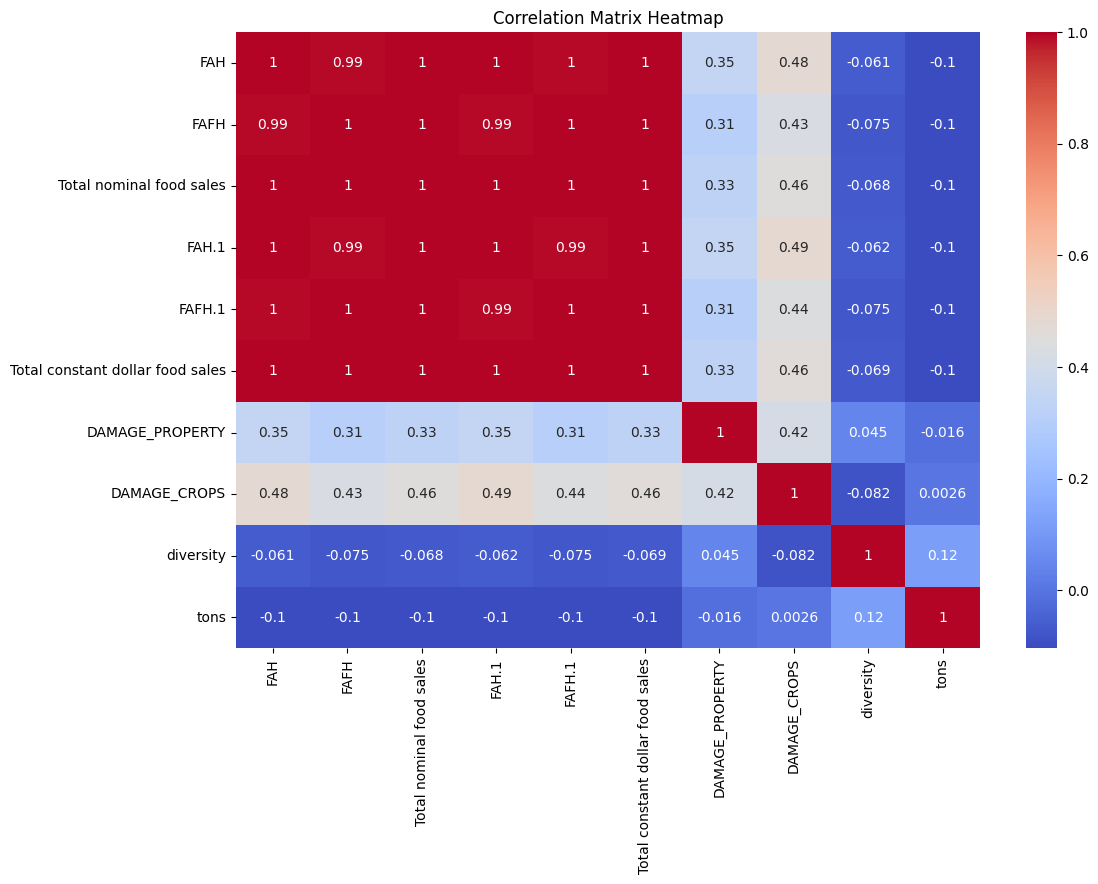

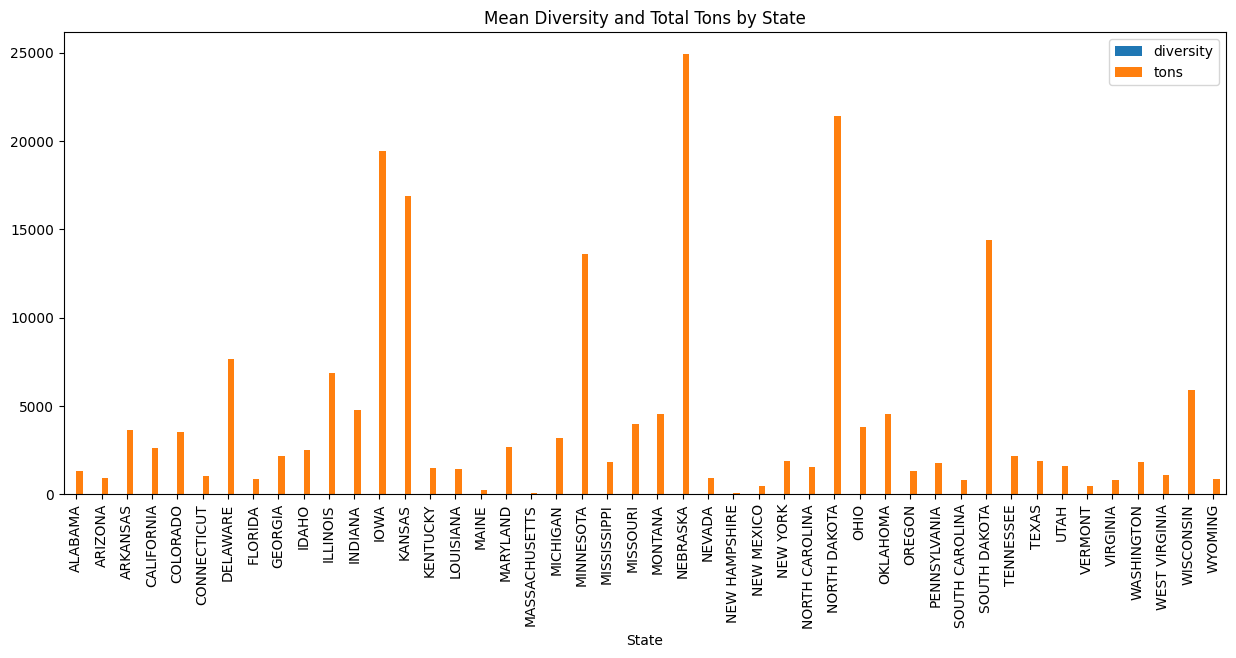

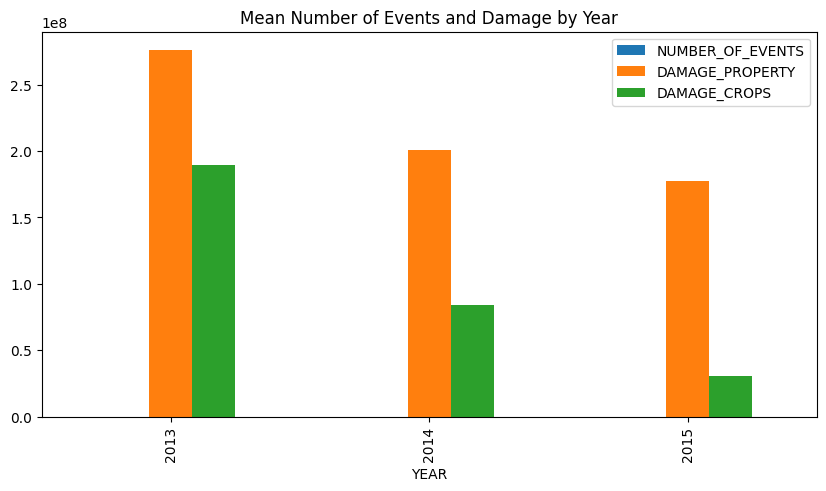

In [8]:
# Convert 'FAH.1' and 'FAFH.1' from object to float
df['FAH.1'] = df['FAH.1'].str.replace(',', '').astype(float)
df['FAFH.1'] = df['FAFH.1'].str.replace(',', '').astype(float)

# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Distribution Analysis - Histograms for Continuous Variables
continuous_vars = ['FAH', 'FAFH', 'Total nominal food sales', 'FAH.1', 'FAFH.1', 'Total constant dollar food sales', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'diversity', 'tons']
df[continuous_vars].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

# Boxplots for Continuous Variables by Year
for var in continuous_vars:
    df.boxplot(column=var, by='YEAR', figsize=(6, 4))
    plt.title(f'{var} by Year')
    plt.suptitle('')
    plt.show()

# Correlation Matrix and Heatmap
corr_matrix = df[continuous_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# State-wise and Yearly Trends
# Mean Diversity and Total Tons by State
statewise_diversity_tons = df.groupby('State')[['diversity', 'tons']].mean()
statewise_diversity_tons.plot(kind='bar', figsize=(15, 6))
plt.title('Mean Diversity and Total Tons by State')
plt.show()

# Mean Number of Events and Damage by Year
yearly_events_damage = df.groupby('YEAR')[['NUMBER_OF_EVENTS', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS']].mean()
yearly_events_damage.plot(kind='bar', figsize=(10, 5))
plt.title('Mean Number of Events and Damage by Year')
plt.show()


Year-over-Year Difference Descriptive Statistics:
       diversity_year_diff  tons_year_diff  FAH_year_diff  FAFH_year_diff  \
count          1875.000000     1875.000000    1875.000000     1875.000000   
mean             -0.000262      111.512609     567.743061     1641.077467   
std               0.052039     1646.606647    6714.742386     7000.517513   
min              -0.277383   -10666.478742  -50240.120000   -51847.930000   
25%              -0.007763      -15.384304      13.090000      472.400000   
50%              -0.000743       12.228400     300.710000      957.560000   
75%               0.007262      121.506909     944.750000     2317.610000   
max               0.269877    16285.922779   49630.460000    52452.650000   

       Total nominal food sales_year_diff  \
count                         1875.000000   
mean                          2208.820464   
std                          13618.135549   
min                         -98011.130000   
25%                           

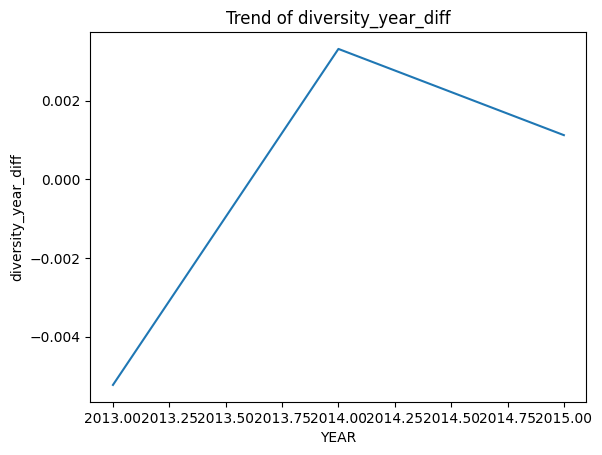

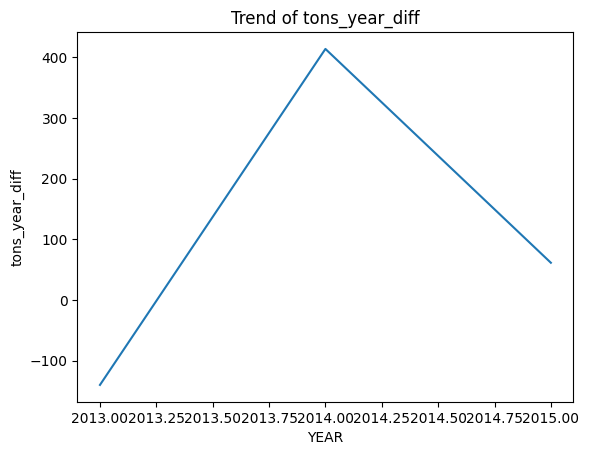

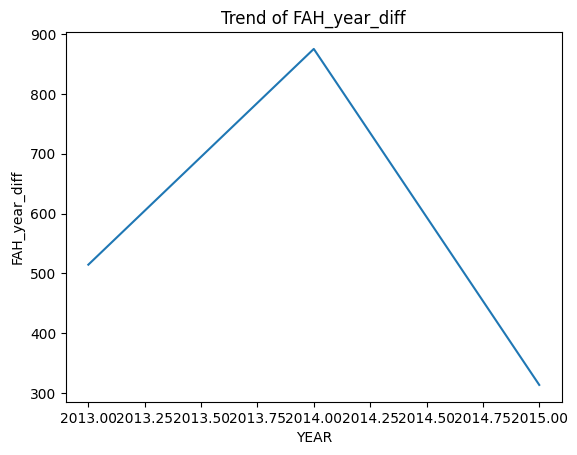

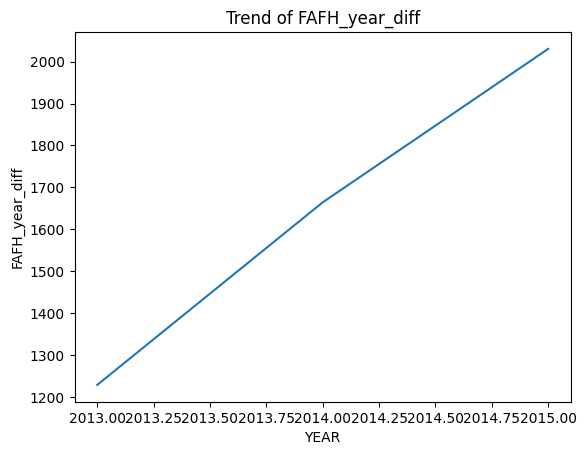

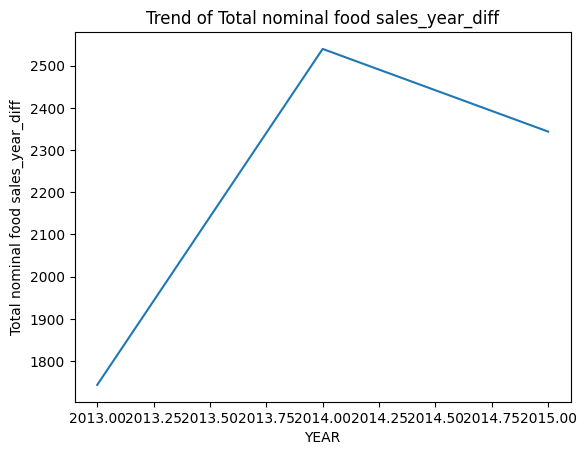

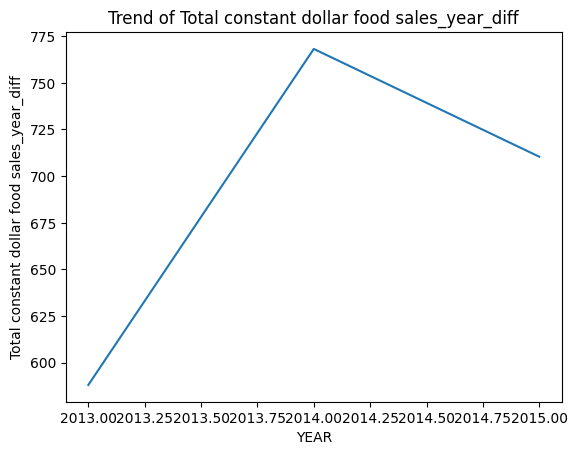

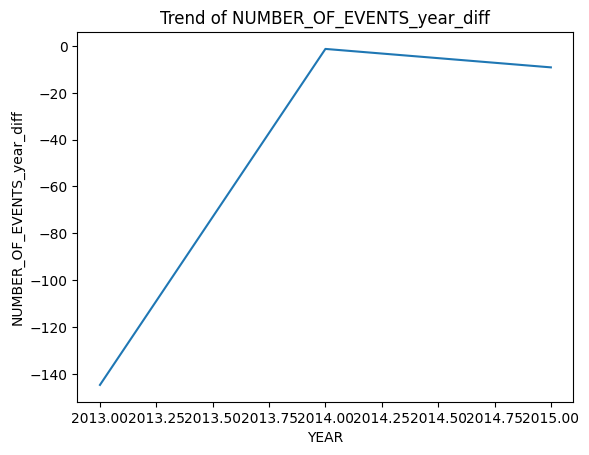

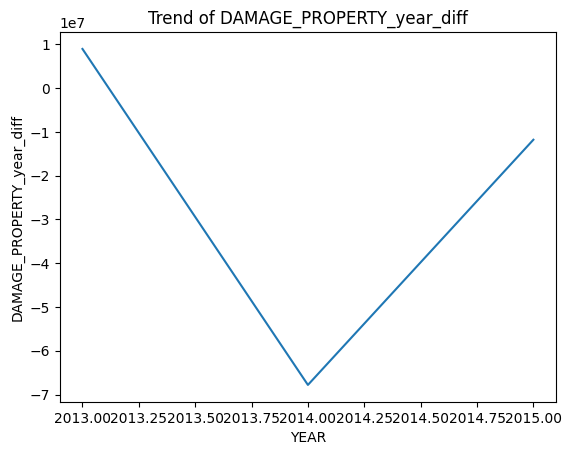

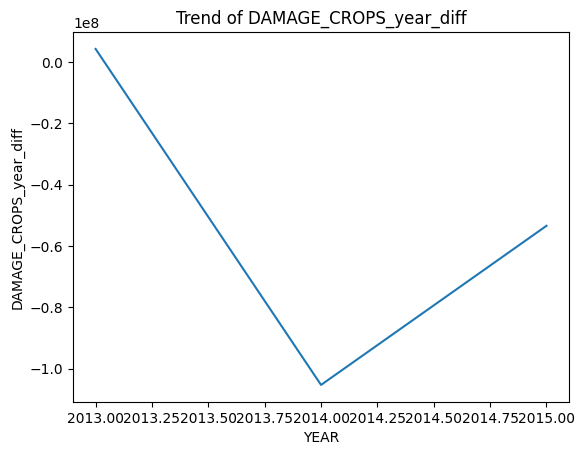

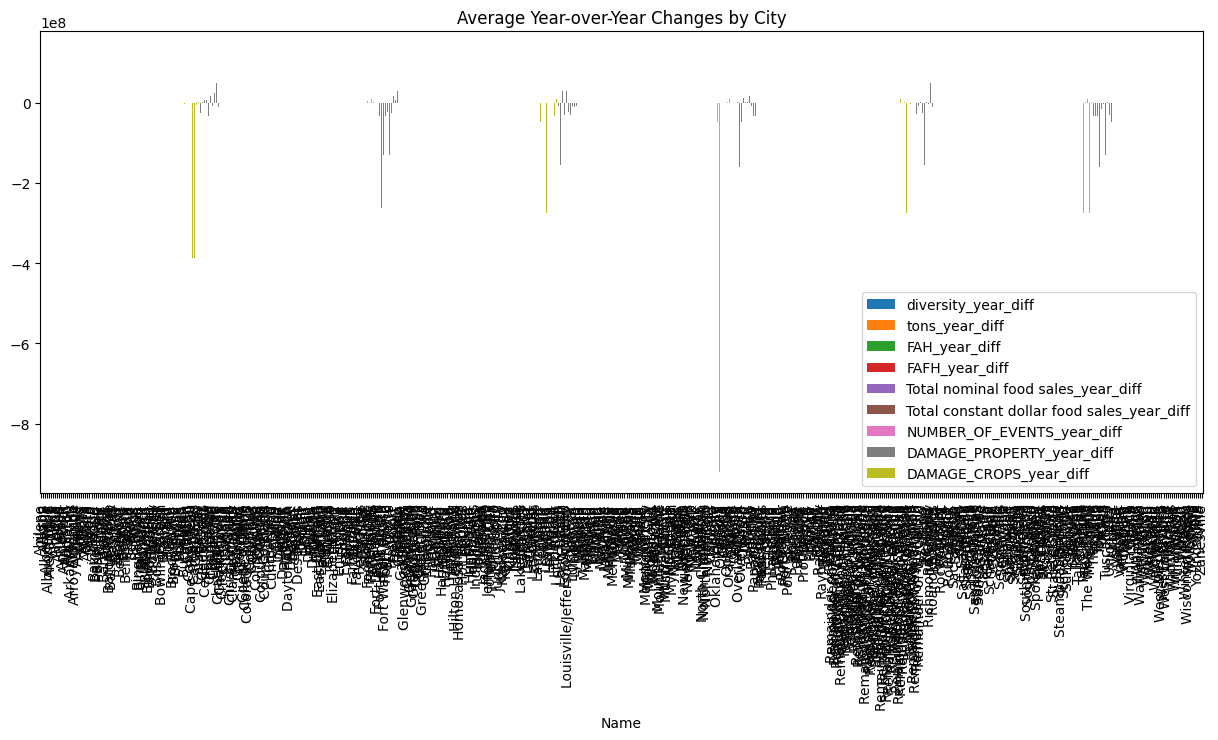

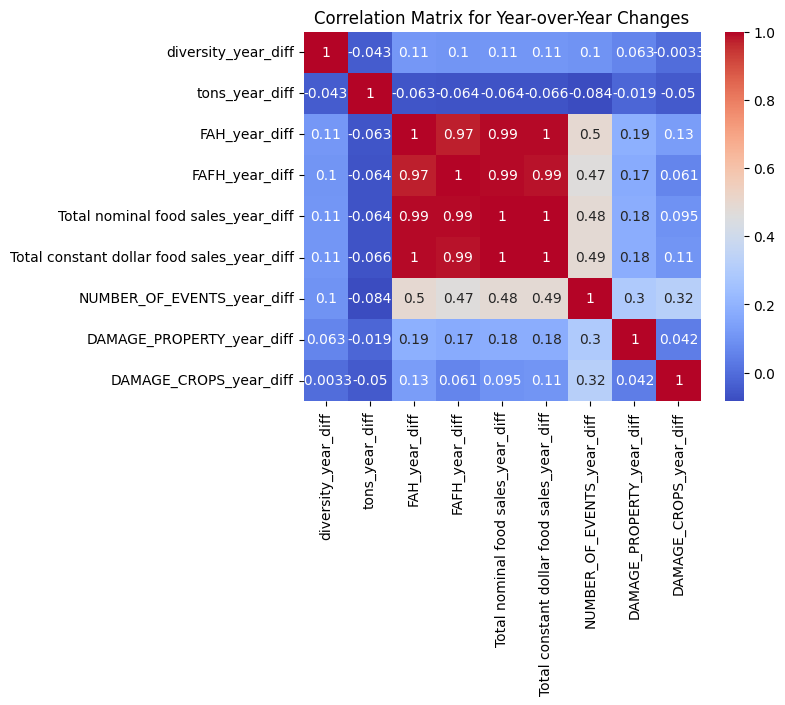

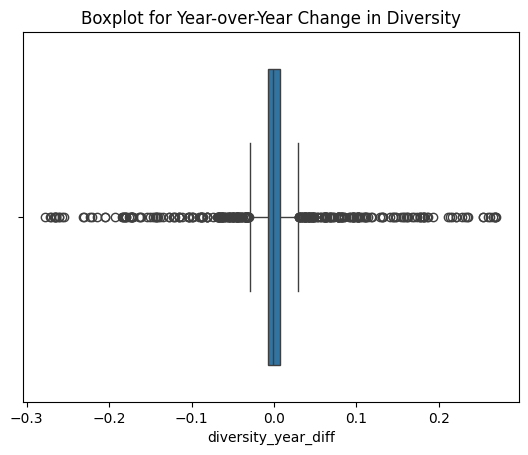

In [9]:
# Year-over-year difference columns
diff_columns = [col for col in df.columns if 'year_diff' in col]

# 1. Summary Statistics for Year-over-Year Differences
print("\nYear-over-Year Difference Descriptive Statistics:")
print(df[diff_columns].describe())

# 2. Trend Analysis - Line Graphs for Year-over-Year Differences
for col in diff_columns:
    df.groupby('YEAR')[col].mean().plot(kind='line', title=f'Trend of {col}')
    plt.ylabel(col)
    plt.show()

# 3. Comparing Year-over-Year Changes Across Cities
city_avg_diff = df.groupby('Name')[diff_columns].mean()
city_avg_diff.plot(kind='bar', figsize=(15, 6), title='Average Year-over-Year Changes by City')
plt.show()

# 4. Correlation Analysis of Year-over-Year Changes
corr_matrix_diff = df[diff_columns].corr()
sns.heatmap(corr_matrix_diff, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Year-over-Year Changes')
plt.show()

# 5. Outlier Detection
# Example for 'diversity_year_diff'
sns.boxplot(x=df['diversity_year_diff'])
plt.title('Boxplot for Year-over-Year Change in Diversity')
plt.show()
